## Raster Data

In [ ]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
sys.path.insert(0, os.path.abspath('../../'))
from skmap.data import toy
from skmap.io import process
import importlib
import time
importlib.reload(process)

n_it = 3
n_n_t = 75
n_n_s = 2500
time_grid_dense = np.empty((n_n_t, n_n_s, n_it))
time_grid_fft = np.empty((n_n_t, n_n_s, n_it))
n_t_vec = range(n_n_t)
n_s_vec = range(n_n_s)
for k in range(n_it):
    for n_t in n_t_vec:
        st_t = time.time()
        print(f"n_t = {n_t}")
        for n_s in n_s_vec:
            data = np.random.rand(1,n_t+1,n_s+1)
            n_f = data.shape[2]-1
            n_p = data.shape[2]-1
            w_f = np.random.rand(n_f)
            w_p = np.random.rand(n_p)
            st = time.time()
            sircleTransformer = process.SircleTransformer(wv_0=1, wv_f=w_f, wv_p=w_p, backend="dense")
            out_dense = sircleTransformer._run(data)
            time_grid_dense[n_t, n_s, k] = time.time()-st
            # sircleTransformer = process.SircleTransformer(w_0=1, w_f=w_f, w_p=w_p, backend="sparse")
            # out_sparse = sircleTransformer._run(data)
            st = time.time()
            sircleTransformer = process.SircleTransformer(wv_0=1, wv_f=w_f, wv_p=w_p, backend="FFT")
            out_fft = sircleTransformer._run(data)
            time_grid_fft[n_t, n_s, k] = time.time()-st
            # sircleTransformer = process.SircleTransformer(w_0=1, w_f=w_f, w_p=w_p, backend="summation")
            # out_sum = sircleTransformer._run(data)
        print(f"{time.time() -st_t}s")
        np.save("time_grid_dense_20240129", time_grid_dense)
        np.save("time_grid_fft_20240129", time_grid_fft)


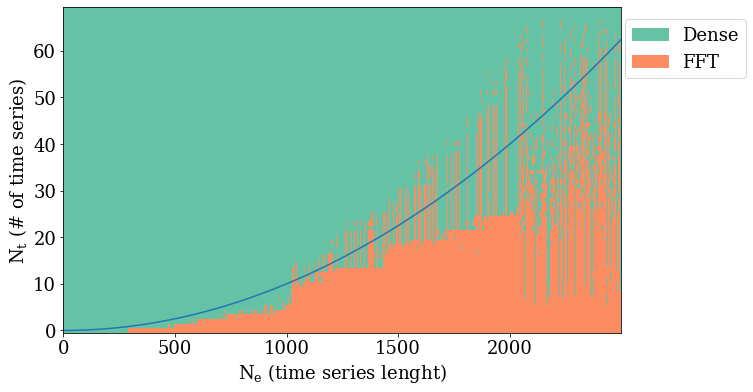

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
time_grid_dense = np.load("time_grid_dense_20240129.npy")
time_grid_fft = np.load("time_grid_fft_20240129.npy")
import matplotlib.patches as mpatches
n_n_t = 100
n_n_s = 2500
r_s = 0
# r_e = 20
r_e = 70
c_s = 0
c_e = n_n_s
time_grid_dense_avg = np.mean(time_grid_dense, 2)
time_grid_fft_avg = np.mean(time_grid_fft, 2)
res = (time_grid_dense_avg-time_grid_fft_avg)>0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,6))

cmap = colors.ListedColormap(['#66c2a5', '#fc8d62'])
bounds=[0,0.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

im = plt.imshow(res[r_s:r_e,c_s:c_e], aspect='auto',  interpolation='nearest', origin='lower', cmap=cmap, norm=norm)
# plt.colorbar()
plt.xlabel('$\mathregular{N_e}$ (time series lenght)')
plt.ylabel('$\mathregular{N_t}$ (# of time series)')
colors = [ im.cmap(im.norm(value)) for value in [0, 1]]
# create a patch (proxy artist) for every color 
labels = ['Dense', 'FFT']
patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=labels[i]) ) for i in [0, 1] ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(0.99, 0.99))
plt.plot(np.arange(2500), np.power(np.arange(2500),2.0)/40/2500)
# plt.savefig('dense_vs_fft.png', dpi=400, bbox_inches="tight")
plt.show()